In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# read data

life_expectancy_at_birth_df = pd.read_csv("DataSets/complete_dataset.csv")
life_expectancy_at_birth_df

,Unnamed: 0,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years,normal_percentage
0,1,AT,2008,F,Y50-54,TOTAL,279.9,Austria,83.3,100.0
1,2,AT,2008,F,Y15-74,ED0-2,1019.0,Austria,83.3,31.9
2,3,AT,2008,F,Y45-49,ED5-8,48.9,Austria,83.3,14.9
3,4,AT,2008,F,Y30-34,ED0-2,43.0,Austria,83.3,16.0
4,5,AT,2008,F,Y50-74,ED3_4,568.7,Austria,83.3,48.8
...,...,...,...,...,...,...,...,...,...,...
78409,78410,UK,2018,M,Y25-74,TOTAL,20099.7,United Kingdom,79.5,100.0
78410,78411,UK,2018,M,Y50-54,ED0-2,571.4,United Kingdom,79.5,25.1
78411,78412,UK,2018,M,Y65-69,ED5-8,523.7,United Kingdom,79.5,32.1
78412,78413,UK,2018,M,Y30-34,ED0-2,360.9,United Kingdom,79.5,16.4


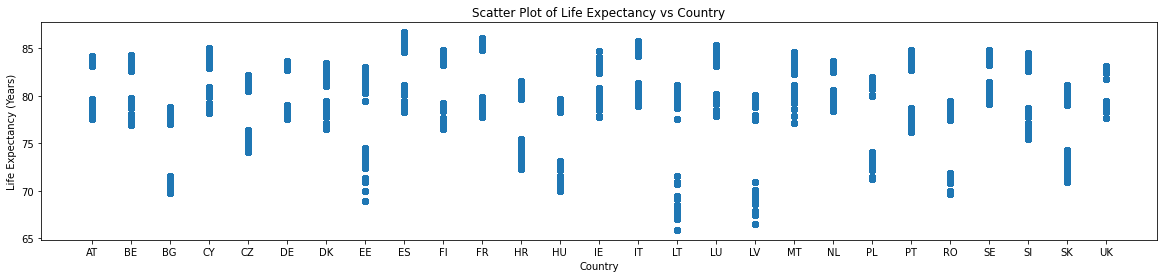

In [3]:
# Scatter Plot
# using all data

plt.figure(figsize=(20,4))
plt.scatter(life_expectancy_at_birth_df['geography'], life_expectancy_at_birth_df['Life_expectancy_in_years'])
plt.title("Scatter Plot of Life Expectancy vs Country")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Years)")

plt.show()

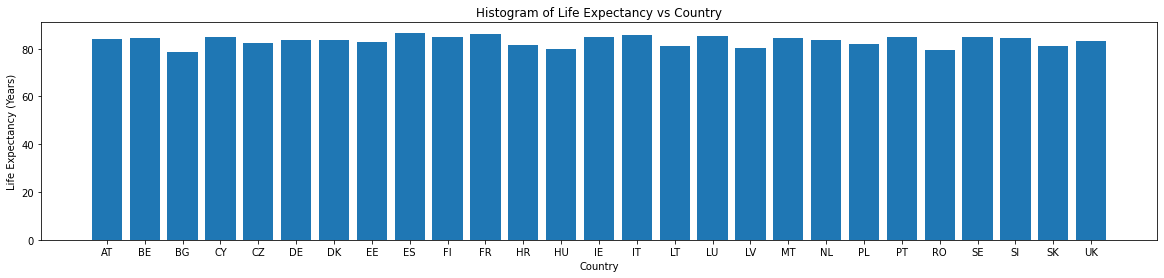

In [4]:
# Histogram Plot

plt.figure(figsize=(20,4))
plt.bar(life_expectancy_at_birth_df['geography'], life_expectancy_at_birth_df['Life_expectancy_in_years'])

plt.title("Histogram of Life Expectancy vs Country")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Years)")
plt.show()

In [5]:
# fitler data for 2010, female, ED5-8 and 50-54 year olds

filtered_2010 = life_expectancy_at_birth_df.query('date == 2010')

filtered_2010_female = filtered_2010.sex.str.contains('F')

filtered_2010_female_df = filtered_2010[filtered_2010_female]

filtered_2010_female_ED5_8 = filtered_2010_female_df.isced11.str.contains('ED5-8')

filtered_2010_female_ED5_8_df = filtered_2010_female_df[filtered_2010_female_ED5_8]

filtered_2010_female_ED5_8_Y50_54 = filtered_2010_female_ED5_8_df.age.str.contains('Y50-54')

filtered_2010_female_ED5_8_Y50_54_df = filtered_2010_female_ED5_8_df[filtered_2010_female_ED5_8_Y50_54]

filtered_2010_female_ED5_8_Y50_54_geo = filtered_2010_female_ED5_8_Y50_54_df.geography.str.contains('')

filtered_2010_female_ED5_8_Y50_54_geo_df = filtered_2010_female_ED5_8_Y50_54_df[filtered_2010_female_ED5_8_Y50_54_geo]

filtered_2010_female_ED5_8_Y50_54_geo_df.head()

,Unnamed: 0,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years,normal_percentage
481,482,AT,2010,F,Y50-54,ED5-8,43.5,Austria,83.5,14.5
3235,3236,BE,2010,F,Y50-54,ED5-8,111.6,Belgium,83.0,28.9
6046,6047,BG,2010,F,Y50-54,ED5-8,73.8,Bulgaria,77.4,27.7
8835,8836,CY,2010,F,Y50-54,ED5-8,7.6,Cyprus,83.9,27.6
11533,11534,CZ,2010,F,Y50-54,ED5-8,42.3,Czechia,80.9,12.3


In [6]:
# fitler data for 2010, male, ED5-8 and 50-54 year olds

filtered_2010 = life_expectancy_at_birth_df.query('date == 2010')

filtered_2010_male = filtered_2010.sex.str.contains('M')

filtered_2010_male_df = filtered_2010[filtered_2010_male]

filtered_2010_male_ED5_8 = filtered_2010_male_df.isced11.str.contains('ED5-8')

filtered_2010_male_ED5_8_df = filtered_2010_male_df[filtered_2010_male_ED5_8]

filtered_2010_male_ED5_8_Y50_54 = filtered_2010_male_ED5_8_df.age.str.contains('Y50-54')

filtered_2010_male_ED5_8_Y50_54_df = filtered_2010_male_ED5_8_df[filtered_2010_male_ED5_8_Y50_54]

filtered_2010_male_ED5_8_Y50_54_geo = filtered_2010_male_ED5_8_Y50_54_df.geography.str.contains('')

filtered_2010_male_ED5_8_Y50_54_geo_df = filtered_2010_male_ED5_8_Y50_54_df[filtered_2010_male_ED5_8_Y50_54_geo]

filtered_2010_male_ED5_8_Y50_54_geo_df.head()

,Unnamed: 0,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years,normal_percentage
669,670,AT,2010,M,Y50-54,ED5-8,60.2,Austria,77.8,20.3
3421,3422,BE,2010,M,Y50-54,ED5-8,108.8,Belgium,77.5,28.0
6125,6126,BG,2010,M,Y50-54,ED5-8,44.5,Bulgaria,70.3,17.2
8936,8937,CY,2010,M,Y50-54,ED5-8,8.9,Cyprus,79.2,33.5
11744,11745,CZ,2010,M,Y50-54,ED5-8,58.5,Czechia,74.5,17.1


The correlation between male life expectancy vs education percent (ED5-8) for 2010 data is 0.46


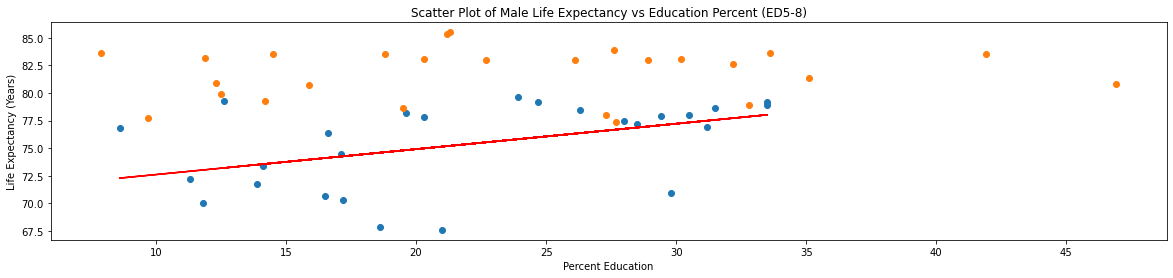

In [7]:
# Scatter Plot
# using filtered data

plt.figure(figsize=(20,4))
plt.scatter(filtered_2010_male_ED5_8_Y50_54_geo_df['normal_percentage'], filtered_2010_male_ED5_8_Y50_54_geo_df['Life_expectancy_in_years'])

plt.scatter(filtered_2010_female_ED5_8_Y50_54_geo_df['normal_percentage'], filtered_2010_female_ED5_8_Y50_54_geo_df['Life_expectancy_in_years'])

plt.title("Scatter Plot of Male Life Expectancy vs Education Percent (ED5-8)")
plt.xlabel("Percent Education")
plt.ylabel("Life Expectancy (Years)")

# Calculate the correlation coefficient and linear regression model 
# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(filtered_2010_male_ED5_8_Y50_54_geo_df['normal_percentage'], filtered_2010_male_ED5_8_Y50_54_geo_df['Life_expectancy_in_years'])
# Print the correlation coefficient
print(f"The correlation between male life expectancy vs education percent (ED5-8) for 2010 data is {round(rvalue, 2)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * filtered_2010_male_ED5_8_Y50_54_geo_df['normal_percentage'] + intercept
plt.plot(filtered_2010_male_ED5_8_Y50_54_geo_df['normal_percentage'],tv_vs_wt_fit,'-', color='r');

plt.show()

In [8]:
# fitler data for 2019, female, ED5-8 and 50-54 year olds

filtered_2019 = life_expectancy_at_birth_df.query('date == 2019')

filtered_2019_female = filtered_2019.sex.str.contains('F')

filtered_2019_female_df = filtered_2019[filtered_2019_female]

filtered_2019_female_ED5_8 = filtered_2019_female_df.isced11.str.contains('ED5-8')

filtered_2019_female_ED5_8_df = filtered_2019_female_df[filtered_2019_female_ED5_8]

filtered_2019_female_ED5_8_Y50_54 = filtered_2019_female_ED5_8_df.age.str.contains('Y50-54')

filtered_2019_female_ED5_8_Y50_54_df = filtered_2019_female_ED5_8_df[filtered_2019_female_ED5_8_Y50_54]

filtered_2019_female_ED5_8_Y50_54_geo = filtered_2019_female_ED5_8_Y50_54_df.geography.str.contains('')

filtered_2019_female_ED5_8_Y50_54_geo_df = filtered_2019_female_ED5_8_Y50_54_df[filtered_2019_female_ED5_8_Y50_54_geo]

filtered_2019_female_ED5_8_Y50_54_geo_df.head()

,Unnamed: 0,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years,normal_percentage
2596,2597,AT,2019,F,Y50-54,ED5-8,94.0,Austria,84.2,26.6
5394,5395,BE,2019,F,Y50-54,ED5-8,150.3,Belgium,84.3,38.4
8085,8086,BG,2019,F,Y50-54,ED5-8,72.2,Bulgaria,78.8,30.8
10882,10883,CY,2019,F,Y50-54,ED5-8,10.1,Cyprus,84.4,37.1
13652,13653,CZ,2019,F,Y50-54,ED5-8,61.7,Czechia,82.2,18.3


In [9]:
# fitler data for 2019, male, ED5-8 and 50-54 year olds

filtered_2019 = life_expectancy_at_birth_df.query('date == 2019')

filtered_2019_female = filtered_2019.sex.str.contains('M')

filtered_2019_female_df = filtered_2019[filtered_2019_female]

filtered_2019_female_ED5_8 = filtered_2019_female_df.isced11.str.contains('ED5-8')

filtered_2019_female_ED5_8_df = filtered_2019_female_df[filtered_2019_female_ED5_8]

filtered_2019_female_ED5_8_Y50_54 = filtered_2019_female_ED5_8_df.age.str.contains('Y50-54')

filtered_2019_female_ED5_8_Y50_54_df = filtered_2019_female_ED5_8_df[filtered_2019_female_ED5_8_Y50_54]

filtered_2019_female_ED5_8_Y50_54_geo = filtered_2019_female_ED5_8_Y50_54_df.geography.str.contains('')

filtered_2019_male_ED5_8_Y50_54_geo_df = filtered_2019_female_ED5_8_Y50_54_df[filtered_2019_female_ED5_8_Y50_54_geo]

filtered_2019_male_ED5_8_Y50_54_geo_df.head()

,Unnamed: 0,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years,normal_percentage
2719,2720,AT,2019,M,Y50-54,ED5-8,112.4,Austria,79.7,31.6
5415,5416,BE,2019,M,Y50-54,ED5-8,133.5,Belgium,79.8,33.3
8283,8284,BG,2019,M,Y50-54,ED5-8,48.2,Bulgaria,71.6,20.3
11014,11015,CY,2019,M,Y50-54,ED5-8,7.3,Cyprus,80.3,27.2
13799,13800,CZ,2019,M,Y50-54,ED5-8,68.6,Czechia,76.4,19.6


The correlation between male life expectancy vs education percent (ED5-8) for 2019 is 0.57


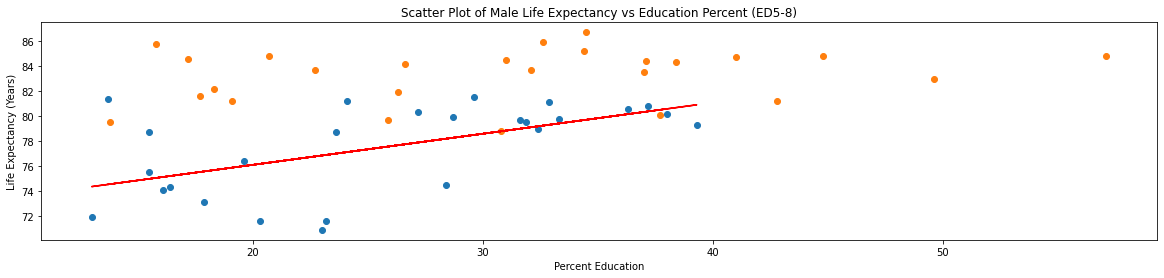

In [10]:
# Scatter Plot
# using filtered data

plt.figure(figsize=(20,4))
plt.scatter(filtered_2019_male_ED5_8_Y50_54_geo_df['normal_percentage'], filtered_2019_male_ED5_8_Y50_54_geo_df['Life_expectancy_in_years'])

plt.scatter(filtered_2019_female_ED5_8_Y50_54_geo_df['normal_percentage'], filtered_2019_female_ED5_8_Y50_54_geo_df['Life_expectancy_in_years'])

plt.title("Scatter Plot of Male Life Expectancy vs Education Percent (ED5-8)")
plt.xlabel("Percent Education")
plt.ylabel("Life Expectancy (Years)")

# Calculate the correlation coefficient and linear regression model 
# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(filtered_2019_male_ED5_8_Y50_54_geo_df['normal_percentage'], filtered_2019_male_ED5_8_Y50_54_geo_df['Life_expectancy_in_years'])
# Print the correlation coefficient
print(f"The correlation between male life expectancy vs education percent (ED5-8) for 2019 is {round(rvalue, 2)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * filtered_2019_male_ED5_8_Y50_54_geo_df['normal_percentage'] + intercept
plt.plot(filtered_2019_male_ED5_8_Y50_54_geo_df['normal_percentage'],tv_vs_wt_fit,'-', color='r');

plt.show()